# Credit EDA Case Study
- Reading the data
- Inspecting the data
- Renaming and arranging values
- Missing Values
- Data Imputing
- Imbalance Calculation
- Identifying Outliers
- Correlation
- Univariate Analysis
- Bivariate Analysis


## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading the Application Data and Previous application Data

Here we are reading the data provided to check the columns and values present in the table and draw some information about the data.

In [2]:
application=pd.read_csv("application_data.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
pre_application=pd.read_csv("previous_application.csv")
pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting the data

In [4]:
application.shape

(307511, 122)

In [5]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
#For Previous application

In [9]:
pre_application.shape

(1670214, 37)

In [10]:
pre_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
pre_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [12]:
pre_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [13]:
pre_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [14]:
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [15]:
pre_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Renaming and arranging values

In [16]:
application.AGE = application.DAYS_BIRTH /-365
application.AGE

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [17]:
application.EXPERIENCE = application.DAYS_EMPLOYED /-365
application.EXPERIENCE

0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507   -1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [18]:
application.REGISTRATION_IN_YEARS = application.DAYS_REGISTRATION /-365
application.REGISTRATION_IN_YEARS

0          9.994521
1          3.249315
2         11.671233
3         26.939726
4         11.810959
            ...    
307506    23.167123
307507    12.021918
307508    18.457534
307509     7.019178
307510    14.049315
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [19]:
application.PUBLISH_IN_YEARS = application.DAYS_ID_PUBLISH /-365
application.PUBLISH_IN_YEARS

0          5.808219
1          0.797260
2          6.934247
3          6.676712
4          9.473973
            ...    
307506     5.430137
307507    11.205479
307508    14.109589
307509     2.550685
307510     1.123288
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: float64

In [20]:
abs(application.DAYS_LAST_PHONE_CHANGE)

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [21]:
#Converting categorical columns into numerical columns 

application["NAME_CONTRACT_TYPE"]= pd.factorize(application["NAME_CONTRACT_TYPE"])[0]
application["CODE_GENDER"]= pd.factorize(application["CODE_GENDER"])[0]
application["FLAG_OWN_CAR"]= pd.factorize(application["FLAG_OWN_CAR"])[0]
application["FLAG_OWN_REALTY"]= pd.factorize(application["FLAG_OWN_REALTY"])[0]
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing Values 

In [22]:
#Dropping columing with missing values range from 30-50%

In [23]:
# Dropping the columns which end with _AVG,_MODE,MEDI
application.drop(application.filter(regex="_AVG").columns, axis=1, inplace=True)

In [24]:
application.drop(application.filter(regex="_MODE").columns, axis=1, inplace=True)

In [25]:
application.drop(application.filter(regex="_MEDI").columns, axis=1, inplace=True)

In [26]:
# Count of columns after dropping above data
application.shape

(307511, 75)

In [27]:
# Dropping all the verification documents column taken while applying for the loan
application.drop(application.filter(regex="FLAG_DOCUMENT_").columns,axis=1, inplace=True)

In [28]:
application.drop(application.filter(regex="_SOCIAL_CIRCLE").columns,axis=1, inplace=True) 

In [29]:
# Count of columns after dropping all the required columns
application.shape

(307511, 51)

## Data Imputing

In [30]:
# Merging the EXT_SOURCE columns into one column(EXT_SOURCE_AVG) after taking mean of the 3 columns

In [31]:
application['EXT_SOURCE_AVG'] = application.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
#Droping the previous values
application.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1,inplace=True)

In [32]:
application.shape

(307511, 49)

In [33]:
# Getting Numerical columns from the application table
num_application=application.select_dtypes(include=np.number)
num_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,1,1,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,...,0,0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0.413601
307507,456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.115992
307508,456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,...,1,1,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0.499536
307509,456254,1,0,1,0,0,0,171000.0,370107.0,20205.0,...,1,0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587593


## Imbalance Calculation

0    91.93
1     8.07
Name: TARGET, dtype: float64


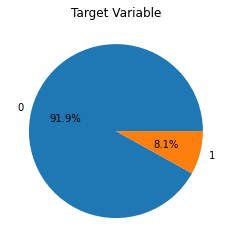

In [34]:
abc=round(application["TARGET"].value_counts(normalize=True)*100,2)
print(abc)
plt.pie(abc,labels=abc.index,autopct='%1.1f%%')
plt.title("Target Variable")
plt.show()

Here we are representing 2 target variables from TARGET column with each of their percentages and displaying as Pie graph

1    65.83
0    34.16
2     0.00
Name: CODE_GENDER, dtype: float64


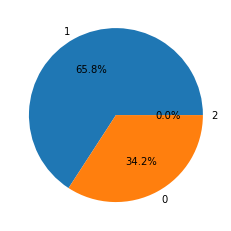

In [35]:
abc=round(application["CODE_GENDER"].value_counts(normalize=True)*100,2)
print(abc)
plt.pie(abc,labels=abc.index,autopct='%1.1f%%')
plt.show()

Here we are representing 3 target variables from CODE_GENDER column with each of their percentages and displaying as Pie graph

## Identifying Outliers

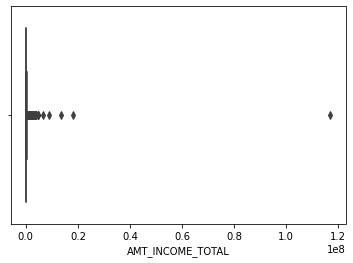

In [36]:
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.show()

In [37]:
#q = application.AMT_INCOME_TOTAL.quantile(0.93)
#application=application[application.AMT_INCOME_TOTAL <=q]

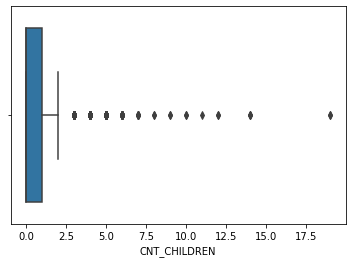

In [38]:
sns.boxplot(application.CNT_CHILDREN)
plt.show()

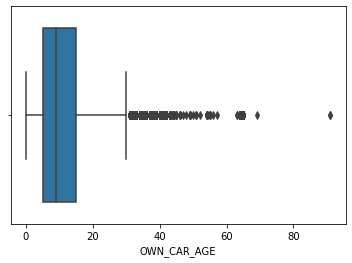

In [39]:
sns.boxplot(application.OWN_CAR_AGE)
plt.show()

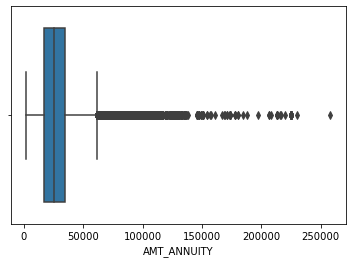

In [40]:
sns.boxplot(application.AMT_ANNUITY)
plt.show()


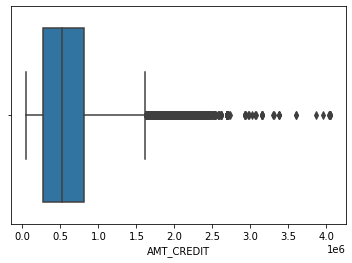

In [41]:
sns.boxplot(application.AMT_CREDIT)
plt.show()


## Correlation

In [43]:
# Getting numerical columns from the application data
application_num_data=application.select_dtypes(include=np.number)

In [44]:
application_num_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_AVG']

In [45]:
num_data=application_num_data.columns.tolist()[2:16] + application_num_data.columns.tolist()[18:26]
num_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

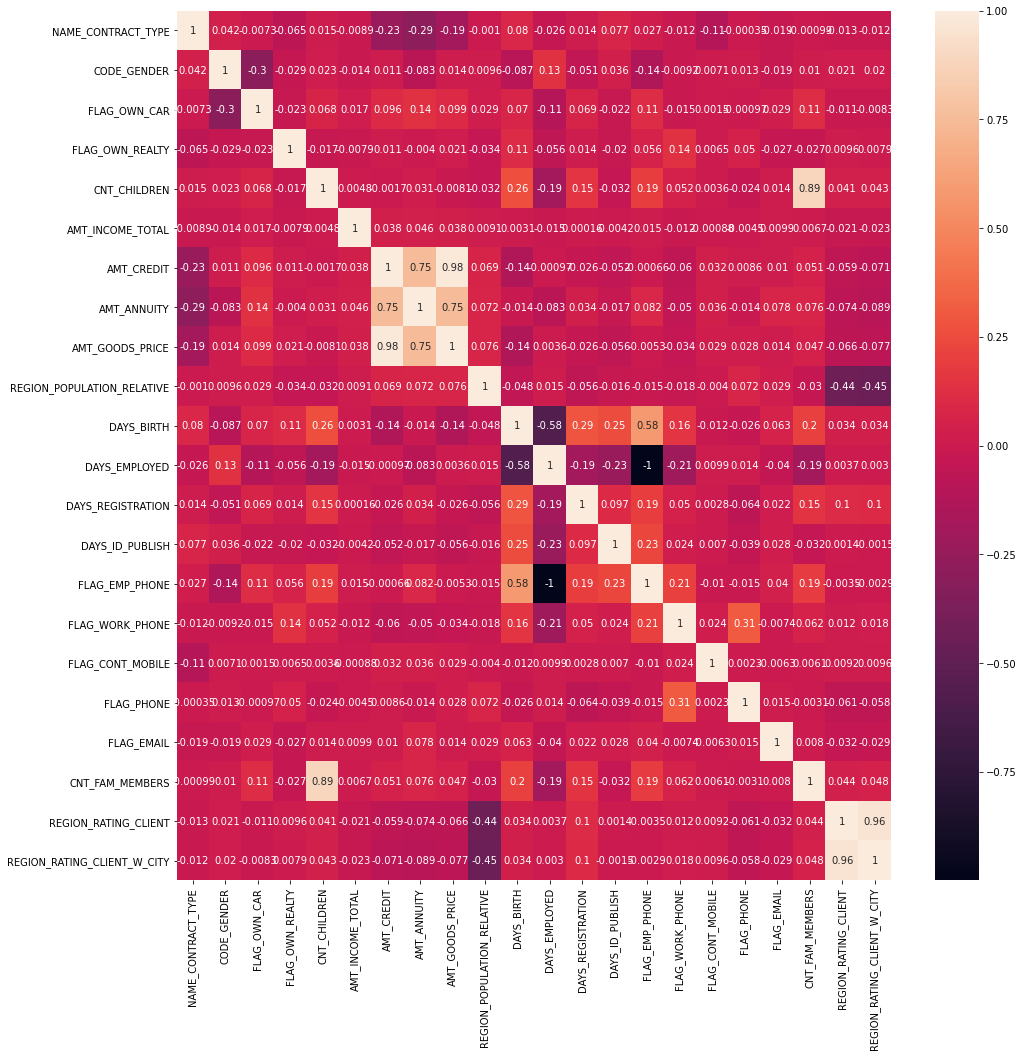

In [46]:
# Corellation of target variables with value 1
target_1=application.loc[application.TARGET==1]
plt.subplots(figsize=(16,16))
sns.heatmap((target_1[num_data].corr()),annot=True)
plt.show()

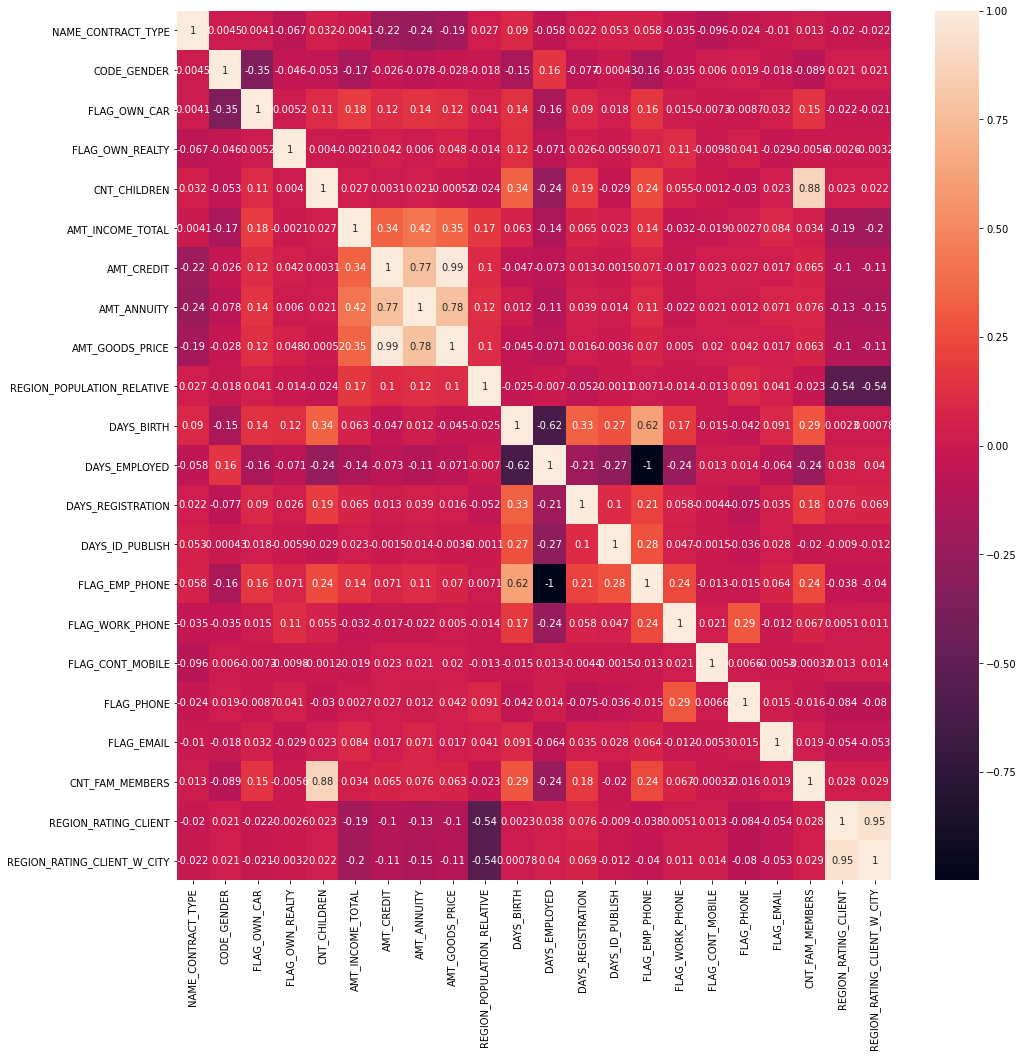

In [47]:
# Corelation of target variables with value 0
target_0=application.loc[application.TARGET==0]
plt.subplots(figsize=(16,16))
sns.heatmap((target_0[num_data].corr()),annot=True)
plt.show()

## Univariate Analysis

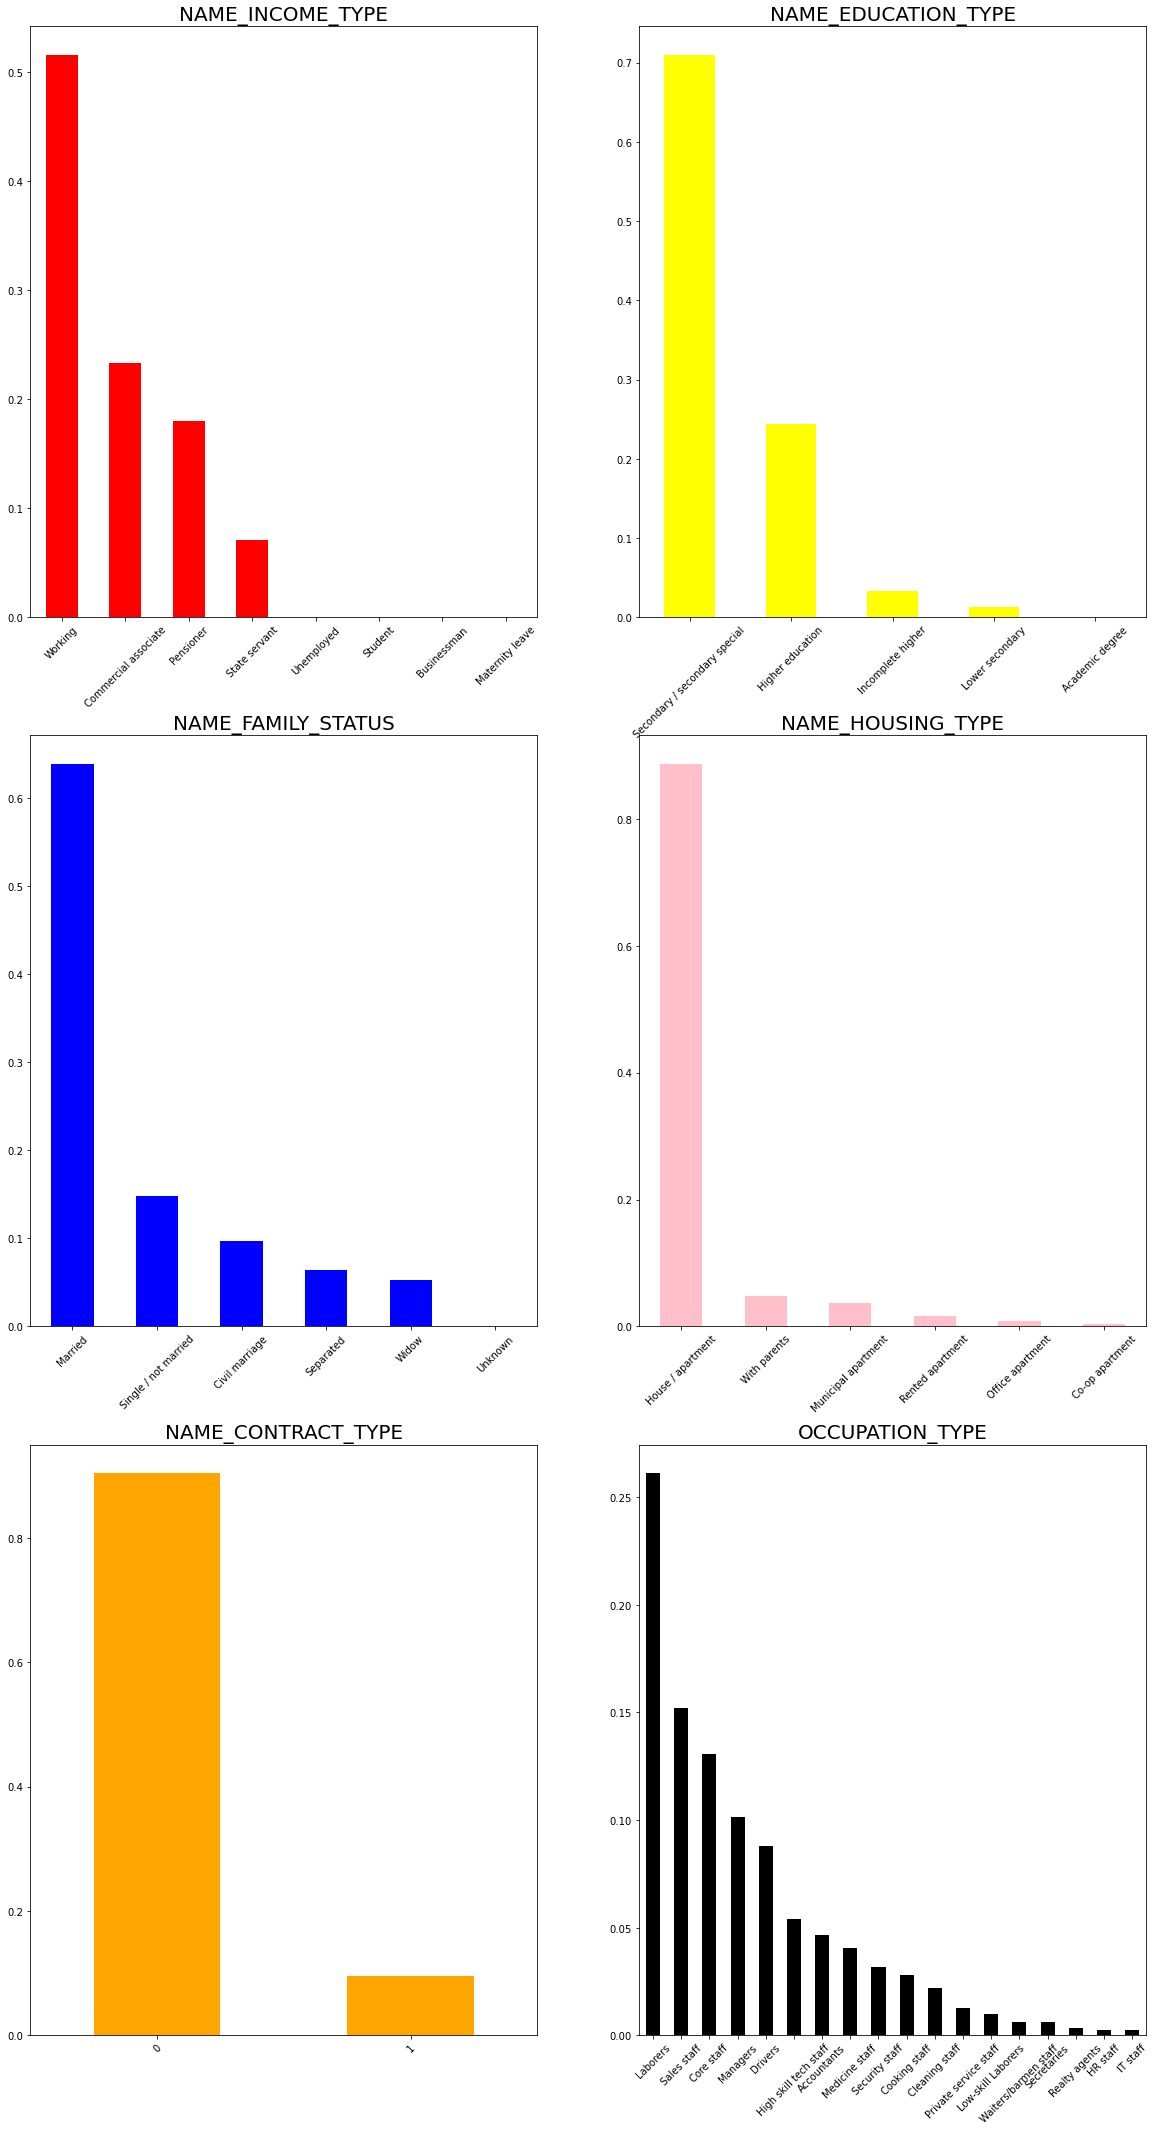

In [48]:
# For application table
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,50))
plt.subplot(4,2,1)
application.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color= "Red")
plt.xticks(rotation=45)
plt.title("NAME_INCOME_TYPE", fontsize= 20)
plt.subplot(4,2,2)
application.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color= "Yellow")
plt.xticks(rotation=45)
plt.title("NAME_EDUCATION_TYPE", fontsize= 20)
plt.subplot(4,2,3)
application.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("NAME_FAMILY_STATUS", fontsize= 20)
plt.subplot(4,2,4)
application.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color= "Pink")
plt.xticks(rotation=45)
plt.title("NAME_HOUSING_TYPE", fontsize= 20)
plt.subplot(4,2,5)
application.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color= "Orange")
plt.xticks(rotation=45)
plt.title("NAME_CONTRACT_TYPE", fontsize= 20)
plt.subplot(4,2,6)
application.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color= "black")
plt.xticks(rotation=45)
plt.title("OCCUPATION_TYPE", fontsize= 20)
plt.show()

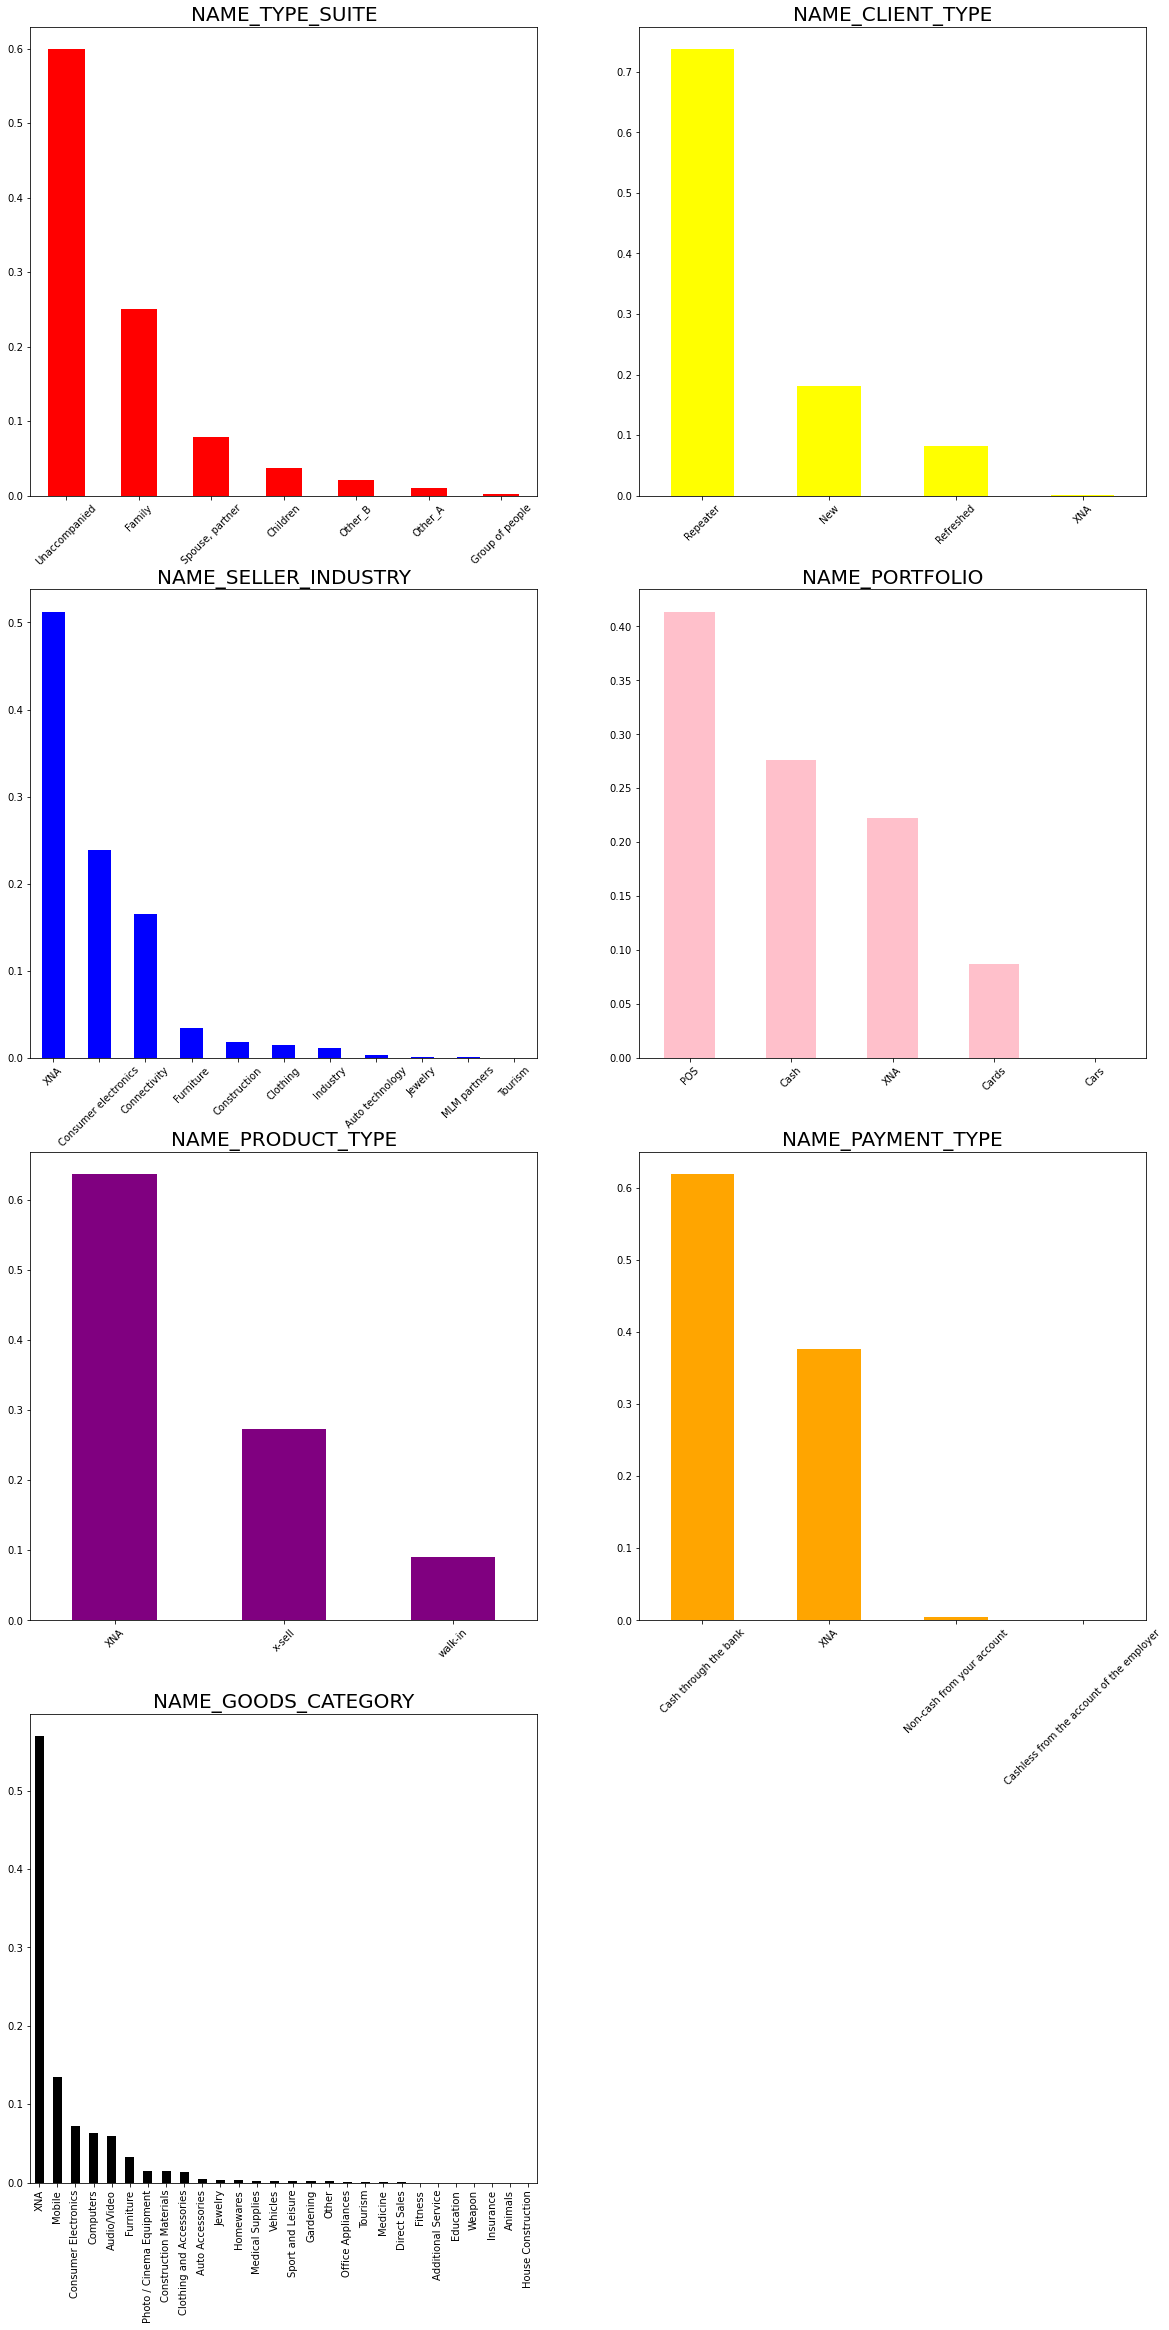

In [49]:
# For Previous application table
#plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,50))
plt.subplot(5,2,1)
pre_application.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar(color= "Red")
plt.xticks(rotation=45)
plt.title("NAME_TYPE_SUITE", fontsize= 20)
plt.subplot(5,2,2)
pre_application.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar(color= "Yellow")
plt.xticks(rotation=45)
plt.title("NAME_CLIENT_TYPE", fontsize= 20)
plt.subplot(5,2,3)
pre_application.NAME_SELLER_INDUSTRY.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("NAME_SELLER_INDUSTRY", fontsize= 20)
plt.subplot(5,2,4)
pre_application.NAME_PORTFOLIO.value_counts(normalize=True).plot.bar(color= "Pink")
plt.xticks(rotation=45)
plt.title("NAME_PORTFOLIO", fontsize= 20)
plt.subplot(5,2,5)
pre_application.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.bar(color= "purple")
plt.xticks(rotation=45)
plt.title("NAME_PRODUCT_TYPE", fontsize= 20)
plt.subplot(5,2,6)
pre_application.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar(color= "Orange")
plt.xticks(rotation=45)
plt.title("NAME_PAYMENT_TYPE", fontsize= 20)
plt.subplot(5,2,7)
pre_application.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.bar(color= "black")
plt.xticks(rotation=90)
plt.title("NAME_GOODS_CATEGORY", fontsize= 20)

plt.show()






## Bivariate Analysis

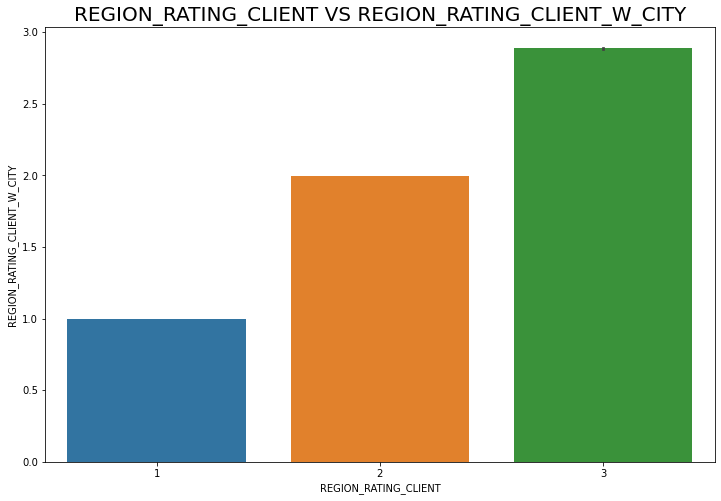

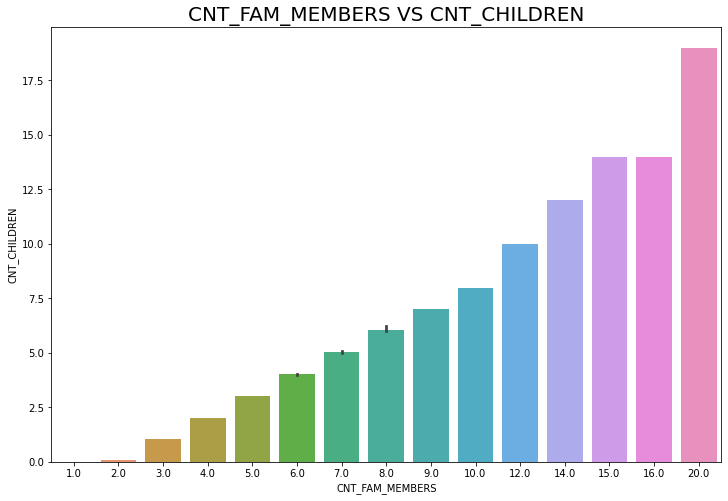

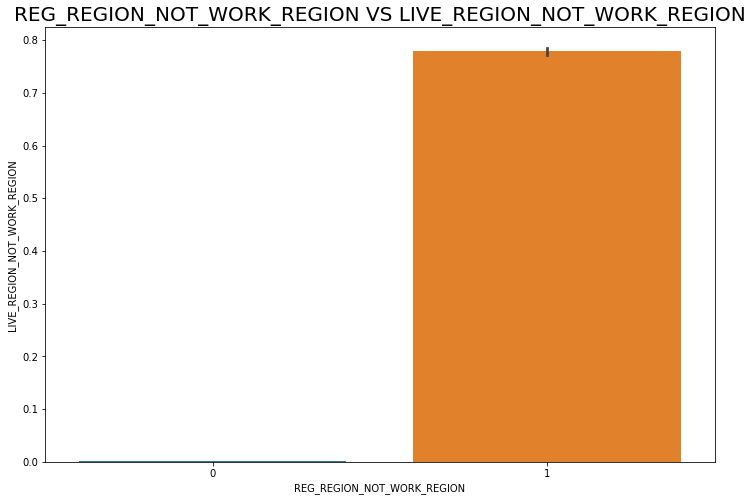

In [51]:
#For Target =0
plt.figure(figsize = (12,8))
sns.barplot(x=target_0.REGION_RATING_CLIENT,y=target_0.REGION_RATING_CLIENT_W_CITY)
plt.title("REGION_RATING_CLIENT VS REGION_RATING_CLIENT_W_CITY", fontsize= 20)
plt.figure(figsize=(12,8))
sns.barplot(x=target_0.CNT_FAM_MEMBERS,y=target_0.CNT_CHILDREN)
plt.title("CNT_FAM_MEMBERS VS CNT_CHILDREN", fontsize= 20)
plt.figure(figsize = (12,8))
sns.barplot(x=target_0.REG_REGION_NOT_WORK_REGION ,y=target_0.LIVE_REGION_NOT_WORK_REGION)
plt.title("REG_REGION_NOT_WORK_REGION VS LIVE_REGION_NOT_WORK_REGION",fontsize= 20)
plt.show()

Graphs representing Bivariate analysis for target variable 0

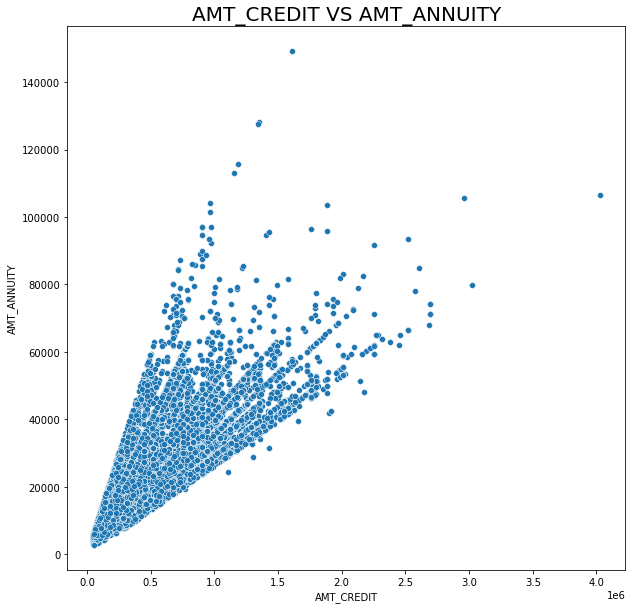

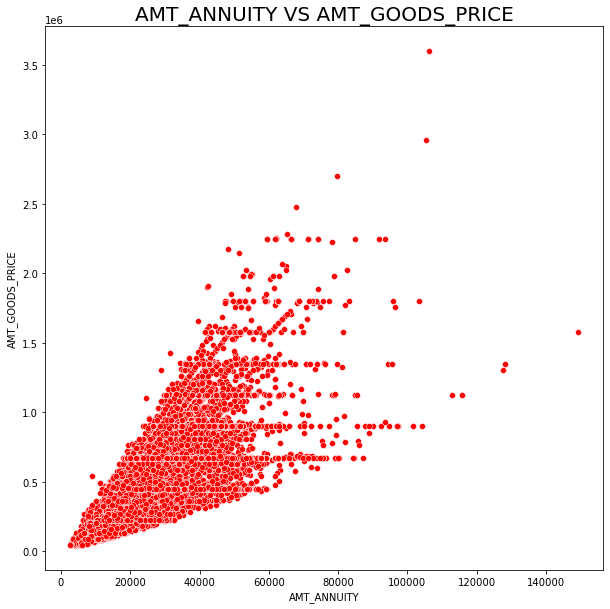

In [52]:
#For Target =1
#plt.subplot(1,2,1)
plt.figure(figsize = (10,10))
sns.scatterplot(x=target_1.AMT_CREDIT ,y=target_1.AMT_ANNUITY)
plt.title("AMT_CREDIT VS AMT_ANNUITY", fontsize= 20)
#plt.subplot(1,2,2)
plt.figure(figsize=(10,10))
sns.scatterplot(x=target_1.AMT_ANNUITY ,y=target_1.AMT_GOODS_PRICE,color="Red")
plt.title("AMT_ANNUITY VS AMT_GOODS_PRICE", fontsize= 20)
plt.show()

Graphs representing Bivariate analysis for target variable 1